# **Shared Bikes Demand Prediction**

> **Problem Statement**- XBikes provides bikes for sharing, here the problem is to predict the count of bikes that will be used on a particular day and find out which conditions can be used to predict the count of bikes that will be used on a particular day.

**Importing Data**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Libraries**

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

## **Data Description**

In [2]:
data= pd.read_csv("/kaggle/input/shared-bikes-demand-prediction/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3737.128257
std,144.193157,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1538.501032
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,125.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,250.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,374.500000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,499.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8362.000000


## **EDA**

In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Text(0.5, 1.0, 'Count plot of total bikes used with respect to Season')

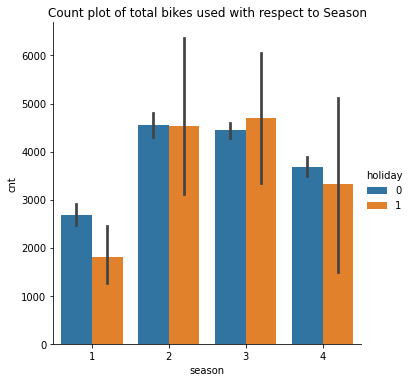

In [5]:
#eda
sns.catplot(x= "season", y="cnt", hue="holiday", kind="bar", data=data)
plt.title('Count plot of total bikes used with respect to Season')

Text(0.5, 1.0, 'Count of bikes used with repect to months')

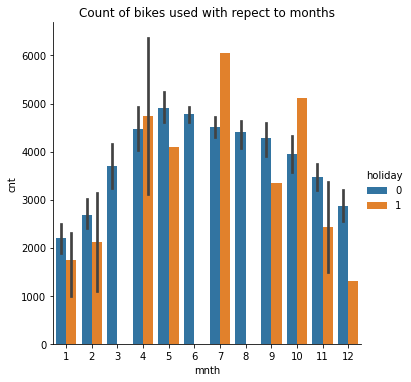

In [6]:
sns.catplot(x="mnth", y="cnt", hue="holiday", kind="bar", data=data)
plt.title("Count of bikes used with repect to months")

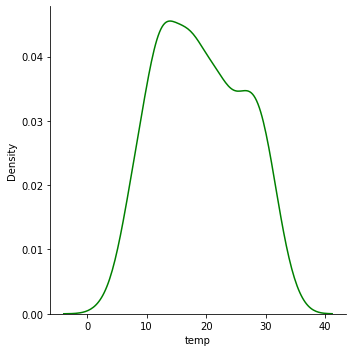

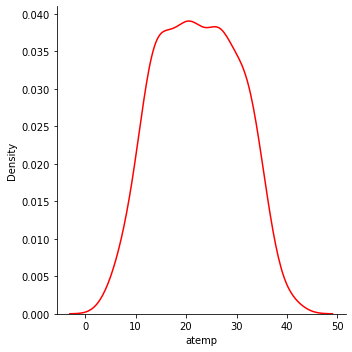

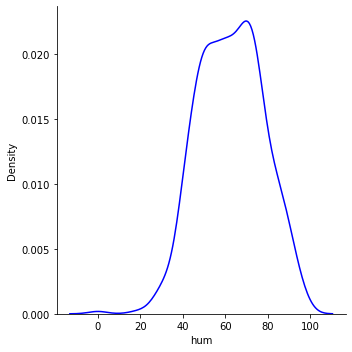

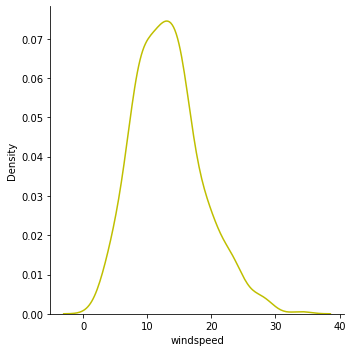

In [7]:
sns.displot(data['temp'], color='g', kind='kde', label='Temperature')
sns.displot(data['atemp'], color='r',kind='kde', label= "Feeling Temperature")
sns.displot(data['hum'], color='b', kind='kde', label= "Humidity")
sns.displot(data['windspeed'], color='y', kind='kde',label= "Wind Speed")
plt.show()

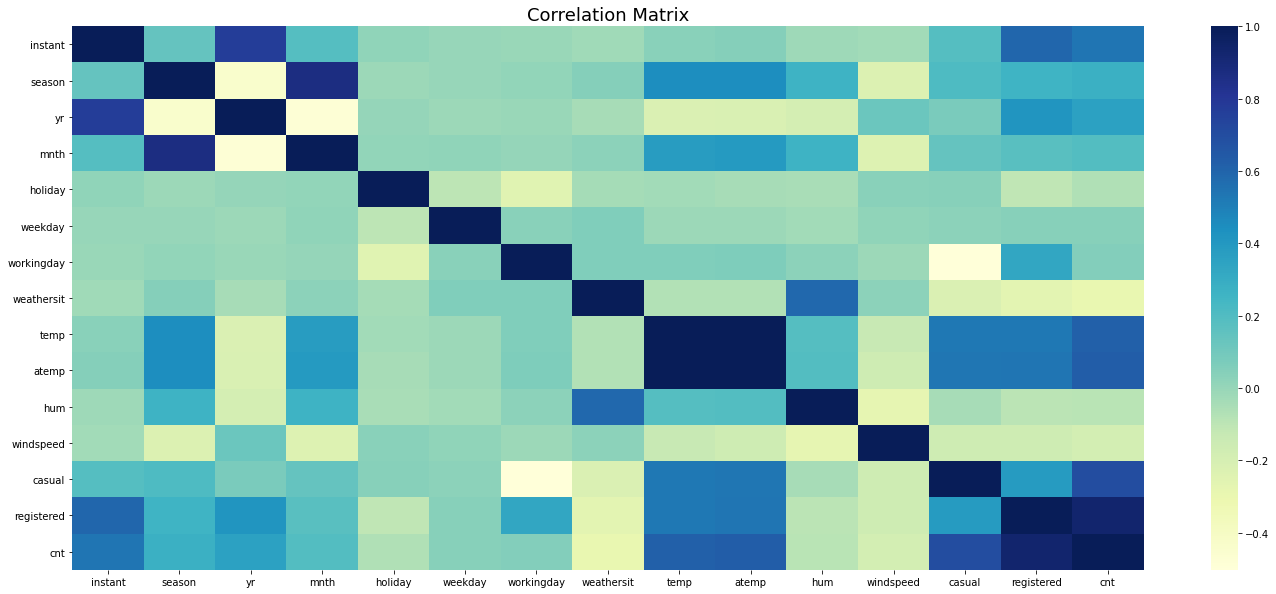

In [8]:
f, (ax) = plt.subplots(1, figsize=(24,10))
corr = data.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=18)
plt.show()

## **Feature Selection**

In [9]:
print(corr['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.930240
casual        0.697908
atemp         0.629020
temp          0.617873
instant       0.537315
yr            0.355828
season        0.283648
mnth          0.193226
workingday    0.053859
weekday       0.043256
holiday      -0.067509
hum          -0.091001
windspeed    -0.184454
weathersit   -0.293301
Name: cnt, dtype: float64


In [10]:
data.drop(['instant'], axis=1, inplace=True)

In the cell below, each and every feature's correlation is checked by the other and one of the features with corrlation> 0.9 is removed

In [11]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
ndata = data[selected_columns]

In [12]:
ndata.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [13]:
ndata.drop('dteday', axis=1 , inplace= True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
y= data['cnt'].values

In [15]:
X= ndata.values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [17]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.235476
Feature 1: 0.140667
Feature 2: 0.407910
Feature 3: 0.000000
Feature 4: 0.039931
Feature 5: 0.034654
Feature 6: 0.111336
Feature 7: 0.479128
Feature 8: 0.057848
Feature 9: 0.000000
Feature 10: 0.673370
Feature 11: 1.595717


In [20]:
ndata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

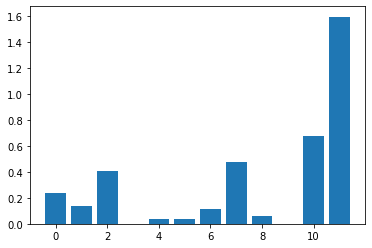

In [21]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

By the method of mutual information regression,the below mentioned features are selected

In [22]:
selected_features= data[['season', 'mnth', 'temp', 'weathersit', 'casual', 'registered', 'windspeed']]

In [23]:
final= selected_features.copy()

In [24]:
final.head()

,season,mnth,temp,weathersit,casual,registered,windspeed
0,1,1,14.110847,2,331,654,10.749882
1,1,1,14.902598,2,131,670,16.652113
2,1,1,8.050924,1,120,1229,16.636703
3,1,1,8.200000,1,108,1454,10.739832
4,1,1,9.305237,1,82,1518,12.522300


In [25]:
X= final.values

**Test- Train Split**

In [210]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling 

In [205]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

## **Problem Modelling**

## Linear Regression Model

In [211]:
#Problem Modelling
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_pred = linear_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = mean_squared_error(y_train_pred, y_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  1.0
Test r2 score:  1.0
Train RMSE: 0.0000
Test RMSE: 0.0000


## Elastic Net Model 

In [212]:
#hyperparameter tuning
el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(X_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')

Optimal alpha: 81867.430172
Optimal l1_ratio: 1.000
Number of iterations 7


In [213]:
#model training
y_train_pred = el_model.predict(X_train)
y_pred = el_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9903972213293867
Test r2 score:  0.9918812104452058
Train RMSE: 137.2854
Test RMSE: 144.4872


## Ridge Regression Model

In [32]:
#hyperparameter tuning
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: False
Optimal solver: lsqr
Best score: -0.05784856250913602


In [33]:
#model training
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9999999990933114
Test r2 score:  0.9999999990495119
Train RMSE: 0.0454
Test RMSE: 0.0494


## Lasso Regression Model

In [34]:
#hyperparameter tuning
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.10
Optimal fit_intercept: True
Optimal normalize: False
Best score: -0.11877031686983208


In [35]:
#model training
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9999999940530901
Test r2 score:  0.999999994077657
Train RMSE: 0.1162
Test RMSE: 0.1234


## KNN Regressor

In [36]:
#hyperparameter tuning
params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 3
Best score: -431.2459639589685


In [37]:
#model training
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9645169504065482
Test r2 score:  0.931695989022516
Train RMSE: 271.9344
Test RMSE: 419.0896


## Random Forest Regressor

In [38]:
#hyperparameter tuning
params_rf = {
    'max_depth': [10, 30, 50, 75],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 30
Optimal max_features: 0.6
Optimal min_sample_leaf: 3
Optimal min_samples_split: 8
Optimal n_estimators: 50
Best score: -215.56669319408905


In [39]:
#model training
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9892619938921
Test r2 score:  0.9805550743046965
Train RMSE: 149.5837
Test RMSE: 223.6078


## LGBM Regressor

In [40]:
#hyperparameter tuning
params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
Optimal lr: 0.1
Optimal feature_fraction: 1
Optimal n_estimators: 100
Best score: -175.47224647922383


In [41]:
#model training
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt', 
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"], 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
y_pred = lgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9982713375185915
Test r2 score:  0.9933655784639527
Train RMSE: 62.5623
Test RMSE: 130.6127


## XGBoost Regressor

In [44]:
#hyperparameter tuning
params_xgb = {
    'learning_rate': [.1, .5, .7, .9],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.6
Optimal n_estimators: 100
Best score: -184.9626923164261


In [45]:
#model training
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(X_train, y_train, early_stopping_rounds=8,
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9985963287517945
Test r2 score:  0.9940484848229757
Train RMSE: 56.1800
Test RMSE: 123.7079


## **Ensemble Learning- Stacking Regressor** 

In [111]:
estimators =[('lgb', lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], 
                               metric='l1',  
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)),
            ('rf', RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True))]
reg = StackingRegressor(estimators=estimators,cv= 5, final_estimator= linear_model)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.993814567938254
Test r2 score:  0.9919654201977165
Train RMSE: 121.2003
Test RMSE: 143.7359


> **Conclusion**- 
1. Features that can be used to predict count of bikes on a particular day are season, month, temperature, weather situation, casual bike users count, registered bike users, windspeed.
2. These features can predict count of bikes with upto 98% of coefficient of determination.

## **Submission**

In [214]:
test= pd.read_csv("../input/shared-bikes-demand-prediction/test.csv")

In [215]:
x_t= test.values

In [217]:
y_t= reg.predict(x_t)

In [219]:
y_t= y_t.tolist()
test['cnt']= y_t

In [220]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433,7304.344267
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142,7216.162418
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118,7412.299231
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,7687.746668
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425,6680.907594


In [221]:
test.to_csv("submission.csv"

**Thank You !!!**